In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
div = pd.read_pickle('../data/div.pkl', compression='zip')

In [101]:
crime = pd.read_pickle('../data/crime.pkl', compression='zip')

In [102]:
sent = pd.read_pickle('../data/sent.pkl', compression='zip')

In [103]:
clinics = pd.read_pickle('../data/clinics.pkl', compression='zip')

In [104]:
init = pd.read_pickle('../data/init.pkl', compression='zip')

In [105]:
intake = pd.read_pickle('../data/intake.pkl', compression='zip')

In [106]:
disp = pd.read_pickle('../data/disp.pkl', compression='zip')

In [107]:
div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26370 entries, 0 to 26369
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   case_id                       26370 non-null  int64 
 1   case_participant_id           26370 non-null  int64 
 2   received_date                 26370 non-null  object
 3   offense_category              26370 non-null  object
 4   diversion_program             26370 non-null  object
 5   referral_date                 26370 non-null  object
 6   diversion_count               26370 non-null  int64 
 7   primary_charge_offense_title  26370 non-null  object
 8   statute                       26370 non-null  object
 9   race                          26370 non-null  object
 10  gender                        26370 non-null  object
 11  diversion_result              18979 non-null  object
 12  diversion_closed_date         18979 non-null  object
dtypes: int64(3), obj

In [108]:
div['referral_date'] = pd.to_datetime(div['referral_date'])
div['received_date'] = pd.to_datetime(div['received_date'])

In [66]:
div.set_index('received_date', inplace=True)

In [67]:
init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121605 entries, 0 to 21604
Data columns (total 38 columns):
 #   Column                                 Non-Null Count    Dtype 
---  ------                                 --------------    ----- 
 0   case_id                                1121605 non-null  object
 1   case_participant_id                    1121605 non-null  object
 2   received_date                          1121605 non-null  object
 3   offense_category                       1121605 non-null  object
 4   primary_charge                         1121605 non-null  bool  
 5   charge_id                              1121605 non-null  object
 6   charge_version_id                      1121605 non-null  object
 7   charge_offense_title                   1121605 non-null  object
 8   charge_count                           1121605 non-null  object
 9   chapter                                1121605 non-null  object
 10  class                                  1121605 non-null 

In [71]:
crime[crime['case_number'] == '698850507464']

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58


In [69]:
init[init['case_participant_id'] == '405130912917']

,case_id,case_participant_id,received_date,offense_category,primary_charge,charge_id,charge_version_id,charge_offense_title,charge_count,chapter,...,bond_type_initial,bond_type_current,bond_amount_initial,bond_amount_current,incident_city,unit,finding_no_probable_cause,incident_end_date,bond_electronic_monitor_flag_initial,bond_electroinic_monitor_flag_current
526,698850507464,405130912917,2011-01-03T00:00:00.000,Narcotics,False,468745302990,315147048981,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,2,720,...,D Bond,D Bond,60000.0000,60000.0000,Chicago,District 18 - Near North,NaN,NaN,NaN,NaN
527,698850507464,405130912917,2011-01-03T00:00:00.000,Narcotics,True,467961651837,314607238080,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,1,720,...,D Bond,D Bond,60000.0000,60000.0000,Chicago,District 18 - Near North,NaN,NaN,NaN,NaN


In [49]:
from datetime import datetime, timedelta
from dateutil.parser import parse

In [31]:
div.index.sort_values()

Index(['1946-07-30T00:00:00.000', '2000-01-01T00:00:00.000',
       '2001-10-24T00:00:00.000', '2003-05-27T00:00:00.000',
       '2008-04-26T00:00:00.000', '2008-05-03T00:00:00.000',
       '2008-10-10T00:00:00.000', '2010-08-10T00:00:00.000',
       '2010-08-11T00:00:00.000', '2010-09-09T00:00:00.000',
       ...
       '2023-04-05T00:00:00.000', '2023-04-05T00:00:00.000',
       '2023-04-05T00:00:00.000', '2023-04-05T00:00:00.000',
       '2023-04-05T00:00:00.000', '2023-04-05T00:00:00.000',
       '2023-04-05T00:00:00.000', '2023-04-05T00:00:00.000',
       '2023-04-05T00:00:00.000', '2023-04-05T00:00:00.000'],
      dtype='object', name='referral_date', length=26370)

In [92]:
init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121605 entries, 0 to 21604
Data columns (total 38 columns):
 #   Column                                 Non-Null Count    Dtype 
---  ------                                 --------------    ----- 
 0   case_id                                1121605 non-null  object
 1   case_participant_id                    1121605 non-null  object
 2   received_date                          1121605 non-null  object
 3   offense_category                       1121605 non-null  object
 4   primary_charge                         1121605 non-null  bool  
 5   charge_id                              1121605 non-null  object
 6   charge_version_id                      1121605 non-null  object
 7   charge_offense_title                   1121605 non-null  object
 8   charge_count                           1121605 non-null  object
 9   chapter                                1121605 non-null  object
 10  class                                  1121605 non-null 

In [94]:
merge = div.join(sent, how = 'left', on = 'case_participant_id', lsuffix = ' ', rsuffix = ' ')

In [96]:
merge.join(init, how = 'left', on = 'case_participant_id ', lsuffix = ' ', rsuffix = ' ')

ValueError: The column label 'case_participant_id ' is not unique.

In [10]:
sent['case_participant_id'].value_counts()

102396199920    99
115648069002    81
116404557880    74
436003168590    59
121604981844    54
                ..
435843027270     1
435843350027     1
435843457613     1
435843780370     1
532607384554     1
Name: case_participant_id, Length: 242061, dtype: int64

In [5]:
div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26370 entries, 0 to 26369
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   case_id                       26370 non-null  int64 
 1   case_participant_id           26370 non-null  int64 
 2   received_date                 26370 non-null  object
 3   offense_category              26370 non-null  object
 4   diversion_program             26370 non-null  object
 5   referral_date                 26370 non-null  object
 6   diversion_count               26370 non-null  int64 
 7   primary_charge_offense_title  26370 non-null  object
 8   statute                       26370 non-null  object
 9   race                          26370 non-null  object
 10  gender                        26370 non-null  object
 11  diversion_result              18979 non-null  object
 12  diversion_closed_date         18979 non-null  object
dtypes: int64(3), obj

In [27]:
people = div.locse_participant_id'].unique()

In [29]:
len(people)

24835

In [19]:
pd.concat([div.set_index([['case_id','case_participant_id']]),
           sent.set_index([['case_id','case_participant_id']])], 
          join ='inner', axis = 1)

ValueError: Length mismatch: Expected 26370 rows, received array of length 2

In [15]:
div.merge(sent, how = 'left', left_on ='case_participant_id', right_on ='case_participant_id')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [47]:
people = div[div['diversion_program'] == 'MHC']['case_id'].unique()

In [48]:
people

array([698842998260, 698850507464, 699084097346, ..., 827794804087,
       828184209952, 828516492230], dtype=int64)

In [40]:
sent['case_participant_id']

0        100145238029
1        100145238029
2        100145238029
3        100145238029
4        100145238029
             ...     
30922    531846000527
30923    531953155888
30924    531973758550
30925    532290437070
30926    532607384554
Name: case_participant_id, Length: 280927, dtype: object

In [49]:
people

array([698842998260, 698850507464, 699084097346, ..., 827794804087,
       828184209952, 828516492230], dtype=int64)

In [50]:
sent[sent['case_id'] == 698842998260]

,case_id,case_participant_id,received_date,offense_category,primary_charge,charge_id,charge_version_id,disposition_charged_offense_title,charge_count,disposition_date,...,felony_review_result,arraignment_date,updated_offense_category,commitment_term,commitment_unit,incident_end_date,charge_disposition_reason,incident_city,unit,MHC


In [36]:
sent['MHC'] = sent['case_participant_id'].apply(lambda x: 1 if x in people else 0)

C:\Users\Finley & Stein\AppData\Local\Temp\ipykernel_17808\2074219384.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  sent['MHC'] = sent['case_participant_id'].apply(lambda x: 1 if x in people else 0)


In [37]:
sent['MHC'].value_counts()

0    280927
Name: MHC, dtype: int64

<Axes: >

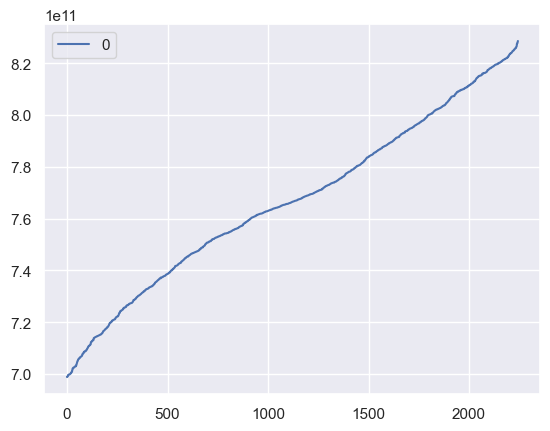

In [54]:
pd.DataFrame(people).plot()

In [59]:
crime.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58'],
      dtype='object')

In [60]:
crime['x_coordinate'].value_counts()

1176352    1816
1100658    1119
1145727     850
1177338     698
1145654     696
           ... 
1167896       1
1201655       1
1125481       1
1175976       1
1190222       1
Name: x_coordinate, Length: 65101, dtype: int64

In [61]:
crime['latitude'].value_counts()

41.883500187    1376
41.976290414    1119
41.754592961     845
41.788987036     690
41.976762981     676
                ... 
41.807726476       1
41.776725325       1
42.01498783        1
41.763374287       1
41.734726658       1
Name: latitude, Length: 291849, dtype: int64